## **8th Annual WiDS Datathon Challenges:** 

### **Unraveling the Mysteries of the Female Brain**

# EDA

* [1. Introduction](#1-introduction)
* [2. Data Import](#2-data-import)
* [3. Dataset Overview](#3-dataset-overview)
* [4. Missing Values](#4-missing-values)   
* [5. Distributions](#5-distributions)
* [6. Correlations](#6-correlations)
* [7. Initial Hypotheses](#7-initial-hypotheses)

# 1. Introduction

https://www.kaggle.com/competitions/widsdatathon2025

The WiDS Datathon was developed with Ann S. Bowers Women’s Brain Health Initiative (WBHI) in collaboration with Cornell University and UC Santa Barbara. 

Datasets and support are provided by the Healthy Brain Network (HBN), the signature scientific initiative of the Child Mind Institute, and the Reproducible Brain Charts project (RBC).


We will analyze diagnostic data, socio-demographic, emotions, and parenting data, and functional MRI data from the Healthy Brain Network (HBN) — the signature scientific initiative of the Child Mind Institute. HBN utilizes a community-referred recruitment model by encouraging the participation of families who have concerns about mental health or learning challenges in their children. The functional MRI data are used to extract a time series of activity per brain region, and these regions’ time series are correlated to obtain functional MRI connectome matrices.

---

The goal is to build a model to predict both an individual’s sex and their ADHD diagnosis using functional brain imaging data of children and adolescents and their socio-demographic, emotions, and parenting information.

---

Challenge Question and Task:

**“What brain activity patterns are associated with ADHD; are they different between males and females, and, if so, how?”**

# 2. Data Import

In [1]:
import sys
import re

import numpy as np
import pandas as pd
import scipy

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

import sklearn

print(f"python version: {sys.version}")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"plotly version: {py.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"scipy version: {scipy.__version__}")

python version: 3.11.11 (main, Dec 11 2024, 10:25:04) [Clang 14.0.6 ]
pandas version: 2.2.3
numpy version: 1.26.4
matplotlib version: 3.10.0
seaborn version: 0.13.2
plotly version: 5.24.1
scikit-learn version: 1.5.2
scipy version: 1.15.2


In [2]:
# data paths

file_path_train_cat_md = "../data/raw/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx"
file_path_train_fun_cm = "../data/raw/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv"
file_path_train_quan_md = "../data/raw/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx"
file_path_train_sol = "../data/raw/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx"

In [3]:
# uploading data

train_cat = pd.read_excel(file_path_train_cat_md)
train_fcm = pd.read_csv(file_path_train_fun_cm)
train_quan = pd.read_excel(file_path_train_quan_md)
train_sol = pd.read_excel(file_path_train_sol)

In [4]:
print("\nTRAIN_CATEGORICAL_METADATA.xlsx - records:")
print(train_cat.shape[0])
print("\nTRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv - records:")
print(train_fcm.shape[0])
print("\nTRAIN_QUANTITATIVE_METADATA.xlsx - records:")
print(train_quan.shape[0])
print("\nTRAINING_SOLUTIONS.xlsx - records:")
print(train_sol.shape[0])


TRAIN_CATEGORICAL_METADATA.xlsx - records:
1213

TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv - records:
1213

TRAIN_QUANTITATIVE_METADATA.xlsx - records:
1213

TRAINING_SOLUTIONS.xlsx - records:
1213


# 3. Dataset Overview

In [5]:
print("\nTRAIN_CATEGORICAL_METADATA.xlsx")
train_cat.info()
print("\nTRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
train_fcm.info()
print("\nTRAIN_QUANTITATIVE_METADATA.xlsx")
train_quan.info()
print("\nTRAINING_SOLUTIONS.xlsx")
train_sol.info()


TRAIN_CATEGORICAL_METADATA.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB

TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv

In [6]:
train_cat.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1170.000000,1159.000000,1210.000000,1198.000000,1182.000000,1015.000000,991.000000
mean,2017.652102,2.014839,0.435897,2.177739,2.294215,17.862270,25.545685,16.876847,30.257316
std,1.122522,1.135147,0.693174,3.204782,0.750660,3.505608,16.757043,3.929558,13.901144
min,2015.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,5.000000,15.000000,20.000000
50%,2018.000000,1.000000,0.000000,1.000000,2.000000,18.000000,30.000000,18.000000,35.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [7]:
train_fcm.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.185265,0.583053,0.439351,0.450398,0.584654,0.554164,0.508957,0.282565,0.426095,0.254628,...,0.044413,-0.079307,-0.037423,0.009393,0.557159,0.376624,0.370711,0.500415,0.476418,0.543181
std,0.238481,0.172632,0.235019,0.212111,0.195918,0.157533,0.179127,0.189683,0.202979,0.208395,...,0.191253,0.204061,0.205052,0.198820,0.150605,0.197995,0.191249,0.177047,0.177732,0.170237
min,-0.657053,-0.224815,-0.517318,-0.440235,-0.486239,-0.059139,-0.181009,-0.341516,-0.353362,-0.578757,...,-0.547155,-0.620350,-0.584162,-0.605647,-0.052284,-0.359869,-0.553067,-0.302408,-0.307228,-0.224057
25%,0.028235,0.495514,0.286137,0.314428,0.486735,0.462448,0.406548,0.152607,0.319183,0.124448,...,-0.087566,-0.220508,-0.187871,-0.124404,0.469147,0.262601,0.242569,0.389078,0.367971,0.442283
50%,0.192886,0.606585,0.469826,0.479330,0.623346,0.577187,0.534237,0.290552,0.452538,0.268802,...,0.043204,-0.093695,-0.044155,0.004375,0.573840,0.391739,0.388528,0.524508,0.496103,0.566455
75%,0.358902,0.710758,0.626871,0.604438,0.726116,0.670072,0.636448,0.423821,0.570470,0.402742,...,0.177608,0.049707,0.104526,0.146865,0.666128,0.521904,0.505970,0.630443,0.600065,0.667402
max,0.824448,0.907209,0.884576,0.876987,0.893974,0.882400,0.892983,0.803253,0.854104,0.828335,...,0.670512,0.596618,0.630932,0.666169,0.889148,0.866371,0.828784,0.914021,0.898459,0.903364


In [8]:
train_quan.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1200.000000,1190.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,853.000000
mean,59.514750,13.419328,3.819317,13.337219,39.767694,17.963364,16.557036,25.498751,2.074751,12.213455,2.324751,7.613787,4.103821,5.539037,4.599668,2.274917,7.740864,11.245678
std,49.744631,2.112830,1.330348,3.593562,4.872729,3.333965,5.146548,3.053720,2.022992,6.517330,2.166399,4.130399,2.808079,2.807063,3.510469,2.089041,2.094832,3.234372
min,-100.000000,0.000000,2.000000,5.000000,23.000000,7.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.670000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,5.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,77.800000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,8.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,94.470000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [9]:
train_sol.describe()

,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000
mean,0.685078,0.342951
std,0.464676,0.474891
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


# 4. Missing Values

In [10]:
print("\nTRAIN_CATEGORICAL_METADATA.xlsx")
print(train_cat.isnull().sum())


TRAIN_CATEGORICAL_METADATA.xlsx
participant_id                        0
Basic_Demos_Enroll_Year               0
Basic_Demos_Study_Site                0
PreInt_Demos_Fam_Child_Ethnicity     43
PreInt_Demos_Fam_Child_Race          54
MRI_Track_Scan_Location               3
Barratt_Barratt_P1_Edu               15
Barratt_Barratt_P1_Occ               31
Barratt_Barratt_P2_Edu              198
Barratt_Barratt_P2_Occ              222
dtype: int64


In [11]:
# Print rows where 'MRI_Track_Scan_Location' column has missing values (NaN)
missing_values_rows = train_cat[train_cat['MRI_Track_Scan_Location'].isna()]

missing_values_rows.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
998,UmN79UUheNpw,2016,1,0.0,0.0,NaN,21.0,25.0,18.0,45.0
1095,x0yuhCZiG4mU,2016,1,0.0,0.0,NaN,18.0,40.0,18.0,45.0
1200,zSOTbT8r7FQ2,2016,1,0.0,NaN,NaN,15.0,0.0,21.0,35.0


❌ a lot NULL values in TRAIN_CATEGORICAL_METADATA 

- Parrents education and occupation

- Child ethnicity and Race

In [12]:
print("\nTRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
print(f"Missing values: {train_fcm.isnull().values.any()}")


TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
Missing values: False


✅ No NULL values in TRAIN_FUNCTIONAL_CONNECTOME_MATRICES

In [13]:
print("\nTRAIN_QUANTITATIVE_METADATA.xlsx")
print(train_quan.isnull().sum())


TRAIN_QUANTITATIVE_METADATA.xlsx
participant_id                  0
EHQ_EHQ_Total                  13
ColorVision_CV_Score           23
APQ_P_APQ_P_CP                 12
APQ_P_APQ_P_ID                 12
APQ_P_APQ_P_INV                12
APQ_P_APQ_P_OPD                12
APQ_P_APQ_P_PM                 12
APQ_P_APQ_P_PP                 12
SDQ_SDQ_Conduct_Problems        9
SDQ_SDQ_Difficulties_Total      9
SDQ_SDQ_Emotional_Problems      9
SDQ_SDQ_Externalizing           9
SDQ_SDQ_Generating_Impact       9
SDQ_SDQ_Hyperactivity           9
SDQ_SDQ_Internalizing           9
SDQ_SDQ_Peer_Problems           9
SDQ_SDQ_Prosocial               9
MRI_Track_Age_at_Scan         360
dtype: int64


In [14]:
train_quan.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [15]:
columns = ['EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial']

In [16]:
missing_values_rows = train_quan[columns].isna()

# Create a boolean mask indicating rows with at least one missing value
rows_with_missing = missing_values_rows.any(axis=1)

# Filter the DataFrame to show only rows with missing values
df_with_missing = train_quan[rows_with_missing]

df_with_missing.head(50)

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
19,16aihxrHTH3I,100.00,14.0,4.0,18.0,38.0,21.0,25.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.537873
44,2A1deC63kVAu,80.00,NaN,3.0,8.0,46.0,13.0,14.0,28.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,10.0,10.156057
52,2Mjpn48uEjoY,33.35,13.0,3.0,18.0,45.0,22.0,15.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.425849
80,3yjwwRWX7KUY,NaN,14.0,3.0,10.0,41.0,23.0,12.0,30.0,0.0,12.0,3.0,4.0,3.0,4.0,8.0,5.0,8.0,9.444216
84,43DBbRe4MRuo,NaN,14.0,3.0,15.0,34.0,18.0,22.0,23.0,2.0,21.0,9.0,8.0,10.0,6.0,13.0,4.0,8.0,11.869952
117,5sysZl4IU7ec,70.00,NaN,3.0,12.0,50.0,23.0,10.0,30.0,5.0,15.0,4.0,9.0,0.0,4.0,6.0,2.0,9.0,9.049965
120,64kiQGd5o5kP,71.14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,0.0,5.0,0.0,3.0,2.0,2.0,9.0,6.172826
139,7DMBKRvxOK7s,65.60,NaN,4.0,19.0,33.0,17.0,34.0,21.0,6.0,21.0,5.0,16.0,10.0,10.0,5.0,0.0,6.0,17.676933
140,7DOnnFs86L8o,100.00,14.0,4.0,9.0,42.0,17.0,14.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.661875
151,7y2enwkXUF55,63.34,NaN,3.0,6.0,43.0,16.0,17.0,26.0,0.0,3.0,1.0,2.0,0.0,2.0,1.0,0.0,10.0,15.002281


In [17]:
df_with_missing.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,41.000000,31.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,41.000000
mean,47.570976,13.709677,3.428571,12.880952,40.809524,18.404762,17.357143,25.976190,2.155556,12.955556,2.600000,7.533333,3.888889,5.377778,5.422222,2.822222,8.022222,11.423846
std,47.276796,0.782881,0.887387,3.775417,5.114485,3.231397,6.449887,2.709406,1.918280,6.701274,2.471658,4.213614,3.135009,3.032318,3.538675,2.124413,1.982754,3.909296
min,-100.000000,10.000000,3.000000,6.000000,31.000000,11.000000,10.000000,20.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.360255
25%,22.270000,14.000000,3.000000,10.000000,37.000000,17.000000,14.000000,24.250000,0.000000,7.000000,1.000000,4.000000,1.000000,3.000000,2.000000,1.000000,7.000000,8.425849
50%,65.600000,14.000000,3.000000,13.000000,41.000000,18.000000,15.500000,27.000000,2.000000,13.000000,2.000000,8.000000,4.000000,5.000000,5.000000,3.000000,9.000000,10.402806
75%,73.340000,14.000000,3.750000,15.000000,45.000000,21.000000,20.500000,28.000000,4.000000,17.000000,4.000000,10.000000,6.000000,8.000000,9.000000,4.000000,10.000000,14.706365
max,100.000000,14.000000,7.000000,22.000000,50.000000,23.000000,35.000000,30.000000,6.000000,29.000000,9.000000,16.000000,10.000000,10.000000,13.000000,9.000000,10.000000,19.839493


In [18]:
train_quan.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1200.000000,1190.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,853.000000
mean,59.514750,13.419328,3.819317,13.337219,39.767694,17.963364,16.557036,25.498751,2.074751,12.213455,2.324751,7.613787,4.103821,5.539037,4.599668,2.274917,7.740864,11.245678
std,49.744631,2.112830,1.330348,3.593562,4.872729,3.333965,5.146548,3.053720,2.022992,6.517330,2.166399,4.130399,2.808079,2.807063,3.510469,2.089041,2.094832,3.234372
min,-100.000000,0.000000,2.000000,5.000000,23.000000,7.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.670000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,5.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,77.800000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,8.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,94.470000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [19]:
counts = train_quan.groupby(['ColorVision_CV_Score']).size()
print(counts)

ColorVision_CV_Score
0.0       6
1.0      10
2.0       8
3.0       4
4.0       2
5.0       4
6.0       2
8.0       3
9.0       2
10.0      5
11.0      8
12.0     26
13.0    141
14.0    969
dtype: int64


In [20]:
columns = [
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP']

missing_values_rows = train_quan[columns].isna()

# Create a boolean mask indicating rows with at least one missing value
rows_with_missing = missing_values_rows.any(axis=1)

# Filter the DataFrame to show only rows with missing values
df_with_missing = train_quan[rows_with_missing]

df_with_missing.head(50)

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
120,64kiQGd5o5kP,71.14,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,0.0,5.0,0.0,3.0,2.0,2.0,9.0,6.172826
350,eC2397lXg3Bm,100.00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,8.0,0.0,0.0,0.0,11.0,3.0,10.0,NaN
362,emH1j2pf9MZk,77.80,14.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,16.0,3.0,9.0,3.0,5.0,7.0,4.0,9.0,NaN
368,epGIlkmYMthb,-16.68,13.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0,0.0,3.0,4.0,3.0,5.0,5.0,5.0,6.235911
421,FudKx3F8glFq,8.94,14.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,0.0,4.0,3.0,1.0,2.0,2.0,7.0,NaN
479,HAHYSPs753Cc,13.34,14.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,0.0,2.0,1.0,1.0,9.0,NaN
735,NHpNjWCsdA90,60.00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,0.0,6.0,3.0,3.0,0.0,0.0,10.0,5.360255
1076,WK20sSlccEMn,33.35,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0,10.0,12.001368
1084,wRGO69GjV1v6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,1.0,9.0,2.0,8.0,3.0,2.0,9.0,6.555783
1098,X7Dq6Oa96HfM,-100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,22.0,6.0,13.0,4.0,10.0,9.0,3.0,8.0,9.411362


In [21]:
columns = [
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial']

missing_values_rows = train_quan[columns].isna()

# Create a boolean mask indicating rows with at least one missing value
rows_with_missing = missing_values_rows.any(axis=1)

# Filter the DataFrame to show only rows with missing values
df_with_missing = train_quan[rows_with_missing]

df_with_missing.head(50)

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
19,16aihxrHTH3I,100.00,14.0,4.0,18.0,38.0,21.0,25.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.537873
52,2Mjpn48uEjoY,33.35,13.0,3.0,18.0,45.0,22.0,15.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.425849
140,7DOnnFs86L8o,100.00,14.0,4.0,9.0,42.0,17.0,14.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.661875
183,A1AXFSUEtLFQ,60.00,13.0,3.0,10.0,40.0,17.0,16.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.173169
703,MMH1uM7wltAr,-46.67,14.0,3.0,13.0,40.0,17.0,15.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.400752
801,p09fwn1IZB6X,66.67,14.0,3.0,10.0,47.0,15.0,14.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.706365
843,qbE8PJ1yZYQB,73.34,14.0,3.0,10.0,43.0,23.0,24.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,U3FzDZTOsMlD,81.14,14.0,5.0,15.0,31.0,20.0,21.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.261464
1073,WHWymJu6zNZi,14.47,14.0,7.0,22.0,36.0,23.0,16.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.670088


❌ a lot NULL values in TRAIN_QUANTITATIVE_METADATA 

- EHQ_EHQ_Total 

- ColorVision_CV_Score

- APQ - missing all data for 1 participant

- SDQ - missing all data for 1 participant

- MRI_Track_Age_at_Scan - a lot of missing values almost 30%

In [22]:
print("\nTRAINING_SOLUTIONS.xlsx")
print(train_sol.isnull().sum())


TRAINING_SOLUTIONS.xlsx
participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64


✅ No NULL values in TRAINING_SOLUTIONS

# 5. Distributions

## Databases: categorical, quantitive and solution

Connecting datasets

In [23]:
print(train_cat.columns)
print(train_quan.columns)
print(train_sol.columns)

merged_train = pd.merge(train_cat, train_quan, on='participant_id', how='inner')
merged_train = pd.merge(merged_train, train_sol, on='participant_id', how='inner')

print(merged_train.info())

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')
Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')
Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3

### TARGET

In [24]:
counts = merged_train.groupby(['Sex_F', 'ADHD_Outcome']).size()
print(counts)

Sex_F  ADHD_Outcome
0      0               216
       1               581
1      0               166
       1               250
dtype: int64


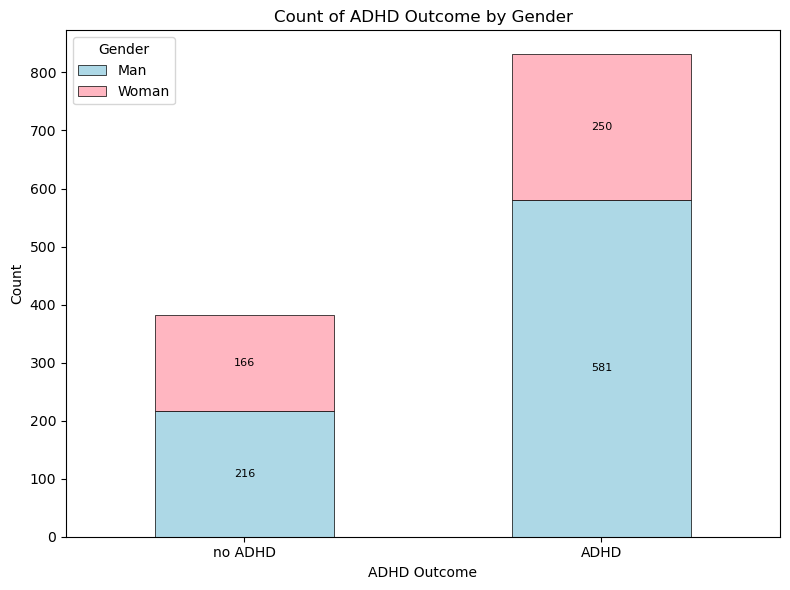

In [25]:
# Creating dataframe from the grouped counts
counts_df = merged_train.groupby(['ADHD_Outcome', 'Sex_F']).size().unstack(fill_value=0)

# Create a stacked bar plot
ax = counts_df.plot(kind='bar', stacked=True, color=['lightblue', 'lightpink'], figsize=(8, 6), edgecolor='black', linewidth=0.5)

# Customize the plot
plt.title('Count of ADHD Outcome by Gender')
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['no ADHD', 'ADHD'], rotation=0)
plt.legend(['Man', 'Woman'], title='Gender', loc='upper left')

# Add counts numbers on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black')


# Show the plot
plt.tight_layout()
plt.show()

⚠️  **Dataset is not balanced.**

There are significant imbalances in both the ADHD and sex target variables, and especially when you look at the combination of both variables.

### FEATURES

In [26]:
merged_train.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,EHQ_EHQ_Total,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000,1170.000000,1159.000000,1210.000000,1198.000000,1182.000000,1015.000000,991.000000,1200.000000,...,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,853.000000,1213.000000,1213.000000
mean,2017.652102,2.014839,0.435897,2.177739,2.294215,17.862270,25.545685,16.876847,30.257316,59.514750,...,2.324751,7.613787,4.103821,5.539037,4.599668,2.274917,7.740864,11.245678,0.685078,0.342951
std,1.122522,1.135147,0.693174,3.204782,0.750660,3.505608,16.757043,3.929558,13.901144,49.744631,...,2.166399,4.130399,2.808079,2.807063,3.510469,2.089041,2.094832,3.234372,0.464676,0.474891
min,2015.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.000000,-100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,5.000000,15.000000,20.000000,46.670000,...,1.000000,5.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901,0.000000,0.000000
50%,2018.000000,1.000000,0.000000,1.000000,2.000000,18.000000,30.000000,18.000000,35.000000,77.800000,...,2.000000,8.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219,1.000000,0.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000,94.470000,...,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871,1.000000,1.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000,100.000000,...,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453,1.000000,1.000000


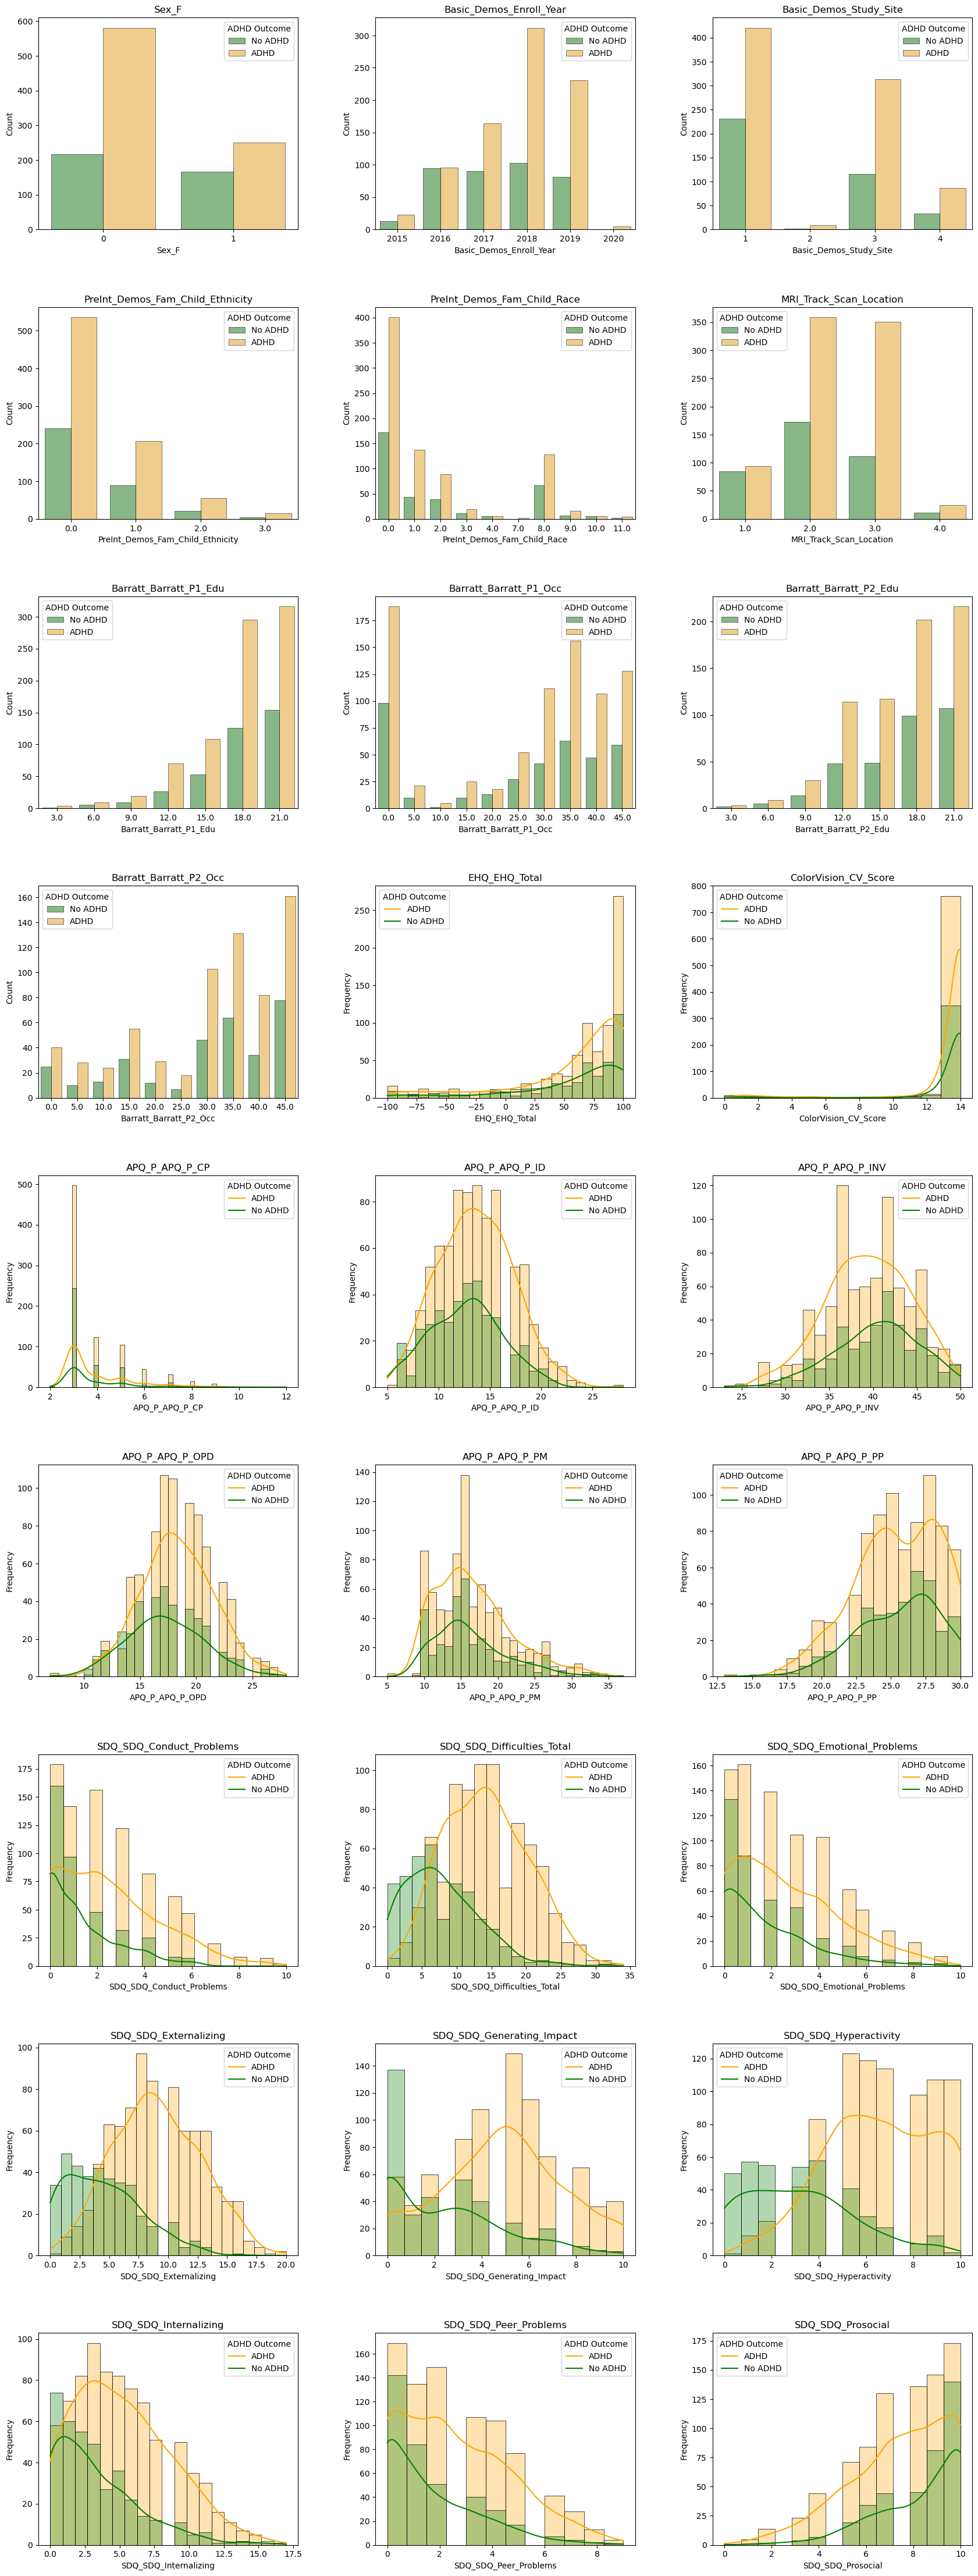

In [27]:
numeric_columns = merged_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

if 'ADHD_Outcome' in numeric_columns:
    numeric_columns.remove('ADHD_Outcome')

num_columns = 3
num_rows = (len(numeric_columns) // num_columns) + (1 if len(numeric_columns) % num_columns != 0 else 0)

plt.figure(figsize=(18, 50))

adhd_order = [0, 1]

adhd_palette = {0: "green", 1: "orange"}

countplot_cols = [
    'Sex_F',
    'Basic_Demos_Enroll_Year',
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity',
    'PreInt_Demos_Fam_Child_Race',
    'MRI_Track_Scan_Location',
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]

histplot_cols = [
    'EHQ_EHQ_Total',
    'ColorVision_CV_Score',
    'APQ_P_APQ_P_CP',
    'APQ_P_APQ_P_ID',
    'APQ_P_APQ_P_INV',
    'APQ_P_APQ_P_OPD',
    'APQ_P_APQ_P_PM',
    'APQ_P_APQ_P_PP',
    'SDQ_SDQ_Conduct_Problems',
    'SDQ_SDQ_Difficulties_Total',
    'SDQ_SDQ_Emotional_Problems',
    'SDQ_SDQ_Externalizing',
    'SDQ_SDQ_Generating_Impact',
    'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Internalizing',
    'SDQ_SDQ_Peer_Problems',
    'SDQ_SDQ_Prosocial'
]

i = 1


for col in countplot_cols:
    plt.subplot(num_rows, num_columns, i)
    sns.countplot(data=merged_train, x=col, hue='ADHD_Outcome',
                    edgecolor='black', linewidth=0.7,
                    palette=adhd_palette,
                    hue_order=adhd_order,
                    alpha=0.5)
    plt.title(col)
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='ADHD Outcome', labels=['No ADHD', 'ADHD'])
    i += 1

for col in histplot_cols:
    plt.subplot(num_rows, num_columns, i)
    
    sns.histplot(data=merged_train, x=col, hue='ADHD_Outcome', kde=True,
                    edgecolor='black', linewidth=0.5,
                    palette=adhd_palette,
                    hue_order=adhd_order,
                    alpha=0.3)
    plt.title(col)
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.legend(title='ADHD Outcome', labels=['ADHD', 'No ADHD'])
    i += 1

plt.tight_layout(pad=5.0)
plt.show()

Based on the visual analysis, here are the most important observations:


*   **SDQ Scores:** The Strengths and Difficulties Questionnaire (SDQ) variables show the most substantial differences between the ADHD and non-ADHD groups. Specifically:
    *   **`SDQ_SDQ_Difficulties_Total`:** Higher scores in the ADHD group.
    *   **`SDQ_SDQ_Externalizing`:** Higher scores in the ADHD group.
    *   **`SDQ_SDQ_Generating_Impact`:** Higher scores in the ADHD group.
    *   **`SDQ_SDQ_Hyperactivity`:** Higher scores in the ADHD group, as expected.
    *   **`SDQ_SDQ_Internalizing`:** Higher scores in ADHD group.
     
     The distributions for the ADHD group are shifted towards higher scores compared to the non-ADHD group, indicating a clear difference in these aspects of behavior and emotional well-being.

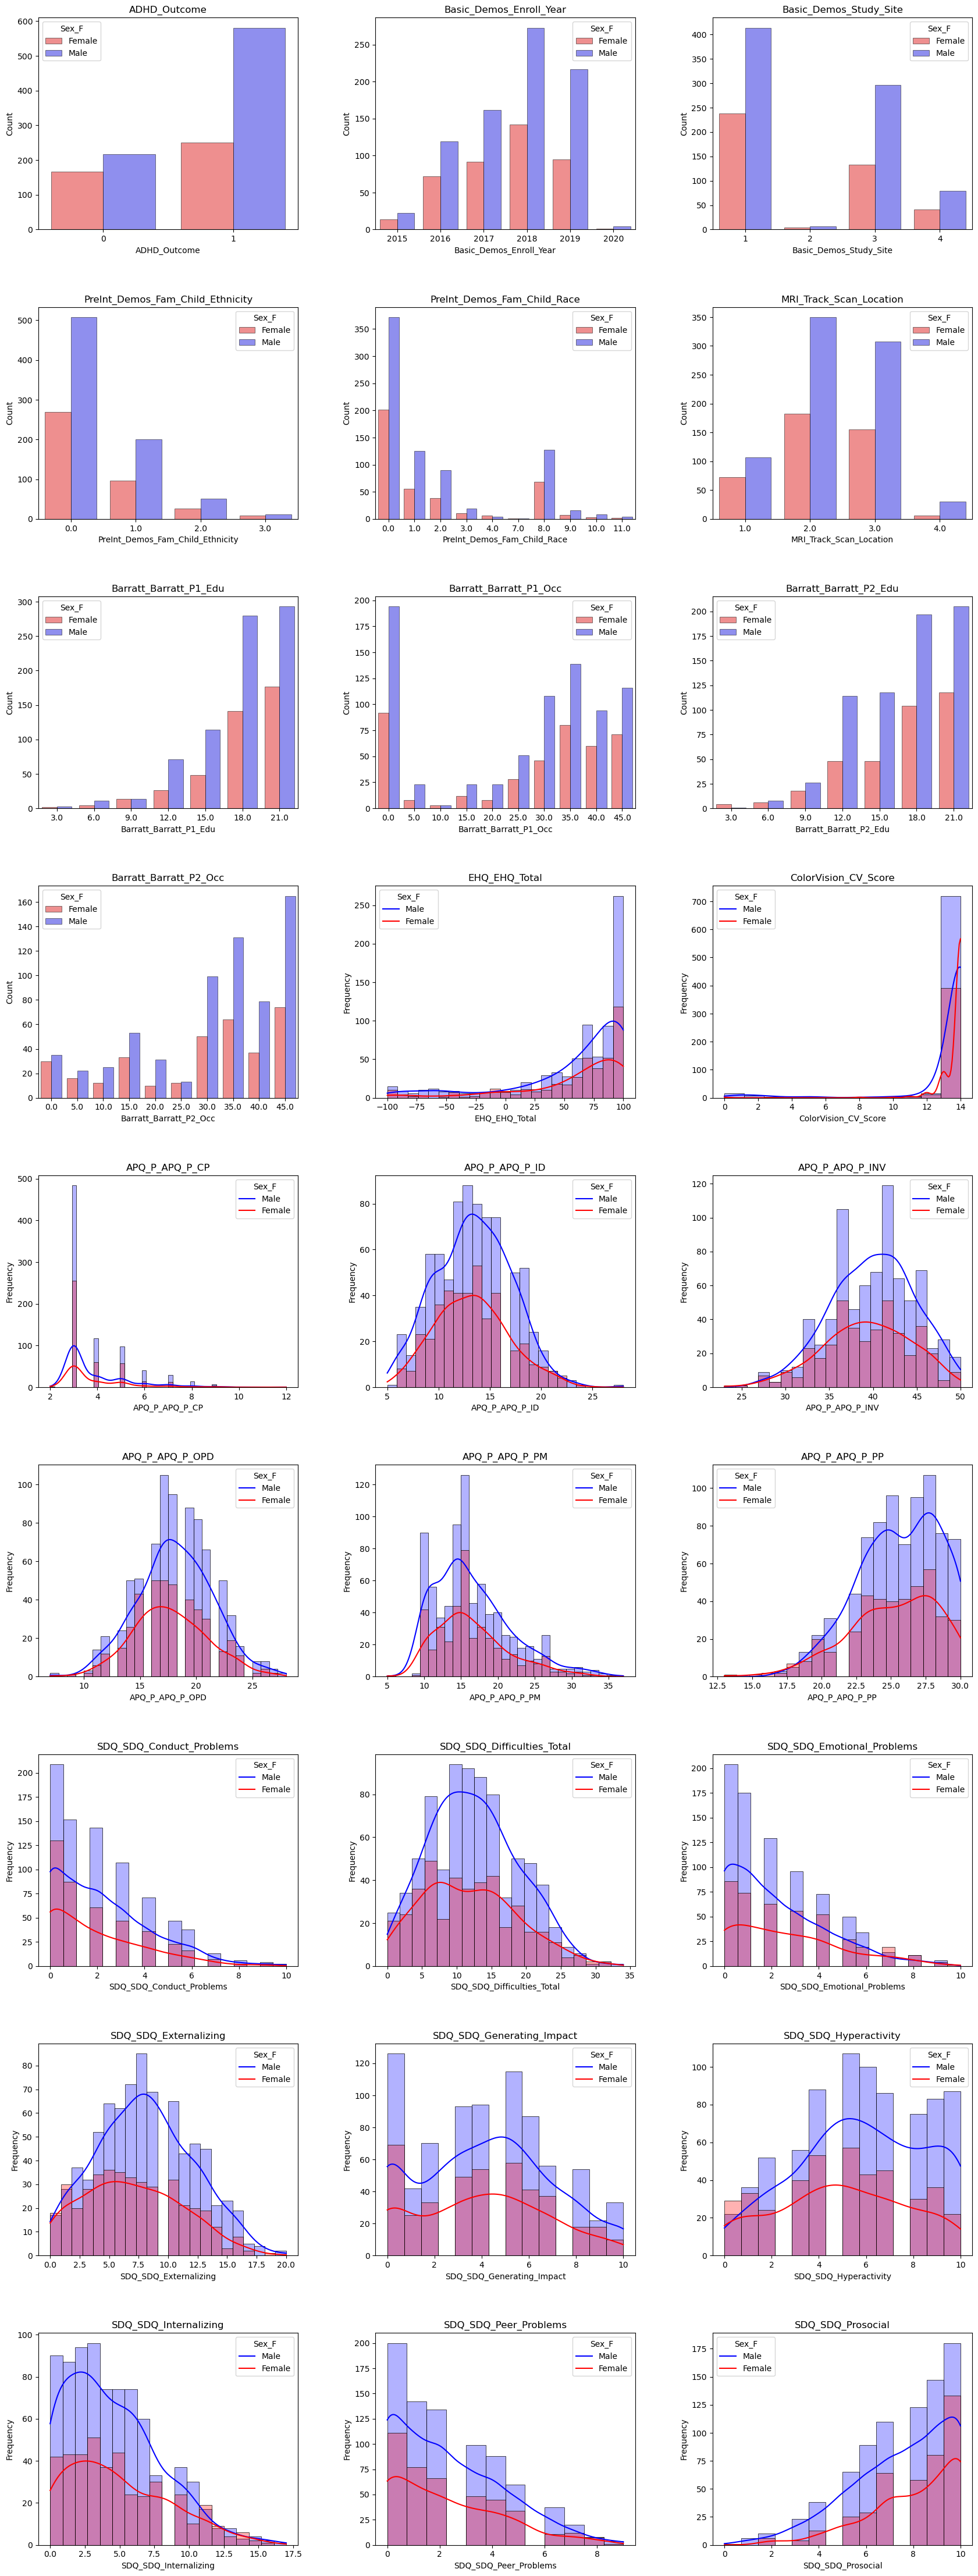

In [28]:
numeric_columns = merged_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

if 'Sex_F' in numeric_columns:
    numeric_columns.remove('Sex_F')

num_columns = 3
num_rows = (len(numeric_columns) // num_columns) + (1 if len(numeric_columns) % num_columns != 0 else 0)

plt.figure(figsize=(18, 50))

sex_order = [1, 0]

sex_palette = {1: "red", 0: "blue"}

countplot_cols = [
    'ADHD_Outcome',
    'Basic_Demos_Enroll_Year',
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity',
    'PreInt_Demos_Fam_Child_Race',
    'MRI_Track_Scan_Location',
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]

histplot_cols = [
    'EHQ_EHQ_Total',
    'ColorVision_CV_Score',
    'APQ_P_APQ_P_CP',
    'APQ_P_APQ_P_ID',
    'APQ_P_APQ_P_INV',
    'APQ_P_APQ_P_OPD',
    'APQ_P_APQ_P_PM',
    'APQ_P_APQ_P_PP',
    'SDQ_SDQ_Conduct_Problems',
    'SDQ_SDQ_Difficulties_Total',
    'SDQ_SDQ_Emotional_Problems',
    'SDQ_SDQ_Externalizing',
    'SDQ_SDQ_Generating_Impact',
    'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Internalizing',
    'SDQ_SDQ_Peer_Problems',
    'SDQ_SDQ_Prosocial'
]

i = 1

for col in countplot_cols:
    plt.subplot(num_rows, num_columns, i)
    sns.countplot(data=merged_train, x=col, hue='Sex_F',
                    edgecolor='black', linewidth=0.7,
                    palette=sex_palette,
                    hue_order=sex_order,
                    alpha=0.5)
    plt.title(col)
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='Sex_F', labels=['Female', 'Male'])
    i += 1

for col in histplot_cols:
    plt.subplot(num_rows, num_columns, i)
    
    sns.histplot(data=merged_train, x=col, hue='Sex_F', kde=True,
                    edgecolor='black', linewidth=0.5,
                    palette=sex_palette,
                    hue_order=sex_order,
                    alpha=0.3)
    plt.title(col)
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.legend(title='Sex_F', labels=['Male', 'Female'])
    i += 1

plt.tight_layout(pad=5.0)
plt.show()


The dataset exhibits a significant imbalance in the sex ratio, with substantially more males (797) than females (416). This imbalance needs to be considered when interpreting visualizations and will require specific handling if machine learning models are used (e.g., oversampling, undersampling, or weighted loss functions).


Despite the overall imbalance, the *proportional* distributions of many variables appear quite similar between males and females. This was assessed by visually comparing the shapes and locations of the Kernel Density Estimation (KDE) curves overlaid on the histograms. When the curves are roughly parallel and have similar shapes, it suggests that the variable's distribution is not strongly related to sex.

**Potential Differences Observed**

While many variables showed no clear visual differences, a few exhibited potential distinctions:

*   **`APQ_P_APQ_P_PP` (Positive Parenting Score):**  A small difference is noticeable at lower values, although the overall distributions are largely similar. Further statistical testing is needed.
*   **`SDQ_SDQ_Emotional_Problems`:** Females tend to have somewhat higher scores on the Emotional Problems scale.
*   **`SDQ_SDQ_Externalizing`:** Females exhibit lower values, particularly at the beginning of the distribution (lower end of the scale).
*   **`SDQ_SDQ_Hyperactivity`:** The distribution for females is flatter and more evenly distributed, while males show a greater concentration of higher hyperactivity scores.
* **`SDQ_SDQ_Internalizing`:** Females have, in general, slightly bigger values and a more even higher frequence for higher values.


## Database: MRI scan data

*Functional Connectomes

After functional MRI (fMRI) data is collected using a resting-state scan (a scan where the participant is not performing a specific task), the raw fMRI data undergoes several preprocessing steps (www.biorxiv.org/content/10.1101/2025.02.24.639850v1), such as: 

- Motion correction to adjust for head movement during scanning; 

- Realignment to align to anatomical scans; 

- Segmentation to divide the brain into regions of interest (ROIs), which are defined by either anatomical or functional criteria; 

- Spatial normalization to align the brain data to a standard template (e.g., MNI space); 

- Temporal filtering to remove noise and physiological signals (like heartbeats or respiration). 

To compute connectivity maps, the time series of fMRI signals (i.e., changes of brain signal over time) for each ROI are extracted and the connections between different brain regions are computed. There are different ways to compute correlations (or connections) among regions, for instance by computing partial or Pearson correlations, and both those methods are equally valid. 

**Pearson Correlation:**

Pearson correlation is a statistical measure of the linear relationship between two time series of two brain regions. Pearson correlation coefficients are calculated between pairs of regions of interest, yielding a matrix of connectivity strengths. This measure is simple, computationally efficient, and easy to interpret but it assumes that the relationship between regions is linear and is sensitive to global signal fluctuations, such as movement artifacts or physiological noise. 

In [29]:
mri_train = pd.merge(train_fcm, train_sol, on='participant_id', how='inner')  # inner join

print(mri_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19903 entries, participant_id to Sex_F
dtypes: float64(19900), int64(2), object(1)
memory usage: 184.2+ MB
None


In [30]:
# New columns based on conditions
mri_train['ADHD_F'] = ((mri_train['Sex_F'] == 1) & (mri_train['ADHD_Outcome'] == 1)).astype(int)
mri_train['ADHD_M'] = ((mri_train['Sex_F'] == 0) & (mri_train['ADHD_Outcome'] == 1)).astype(int)
mri_train['no_ADHD_F'] = ((mri_train['Sex_F'] == 1) & (mri_train['ADHD_Outcome'] == 0)).astype(int)
mri_train['no_ADHD_M'] = ((mri_train['Sex_F'] == 0) & (mri_train['ADHD_Outcome'] == 0)).astype(int)

# Drop the original columns
mri_train.drop(columns=['Sex_F', 'ADHD_Outcome'], inplace=True)

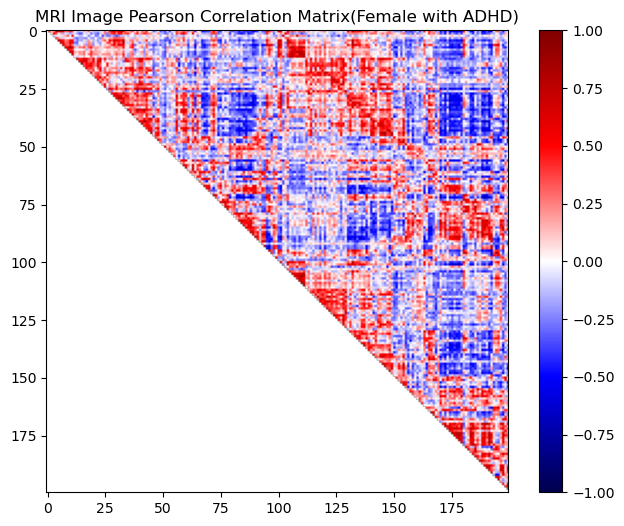

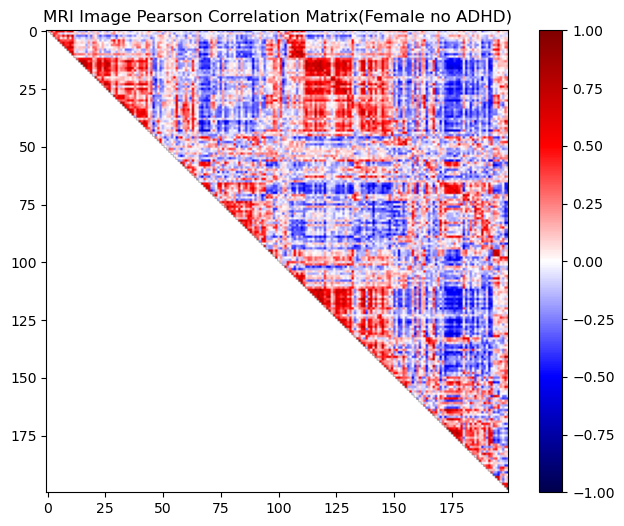

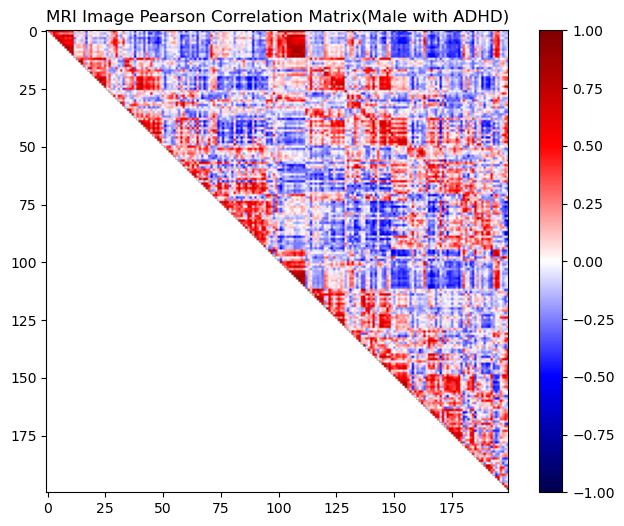

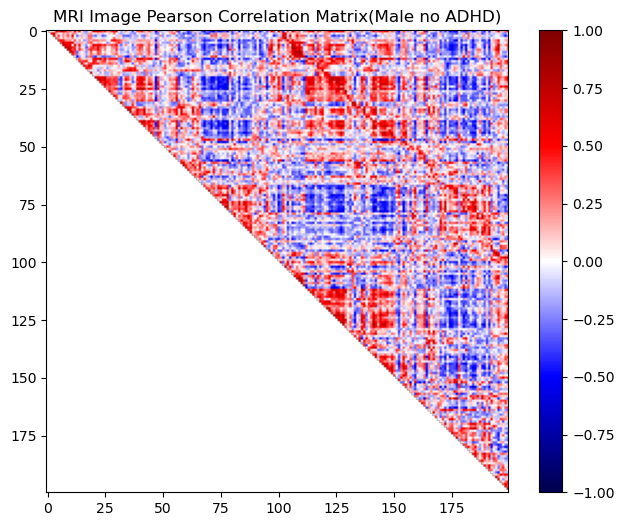

In [31]:
# Filter data to get participants where ADHD_F = 1
adhd_f_data = mri_train[mri_train['ADHD_F'] == 1]
no_adhd_f_data = mri_train[mri_train['no_ADHD_F'] == 1]
adhd_m_data = mri_train[mri_train['ADHD_M'] == 1]
no_adhd_m_data = mri_train[mri_train['no_ADHD_M'] == 1]


# Select one random participant from the filtered data
random_participant_adhd = adhd_f_data.sample(1).iloc[0]  # Get one row of data
random_participant_noadhd = no_adhd_f_data.sample(1).iloc[0]
random_participant_adhd_m = adhd_m_data.sample(1).iloc[0]
random_participant_noadhd_m = no_adhd_m_data.sample(1).iloc[0]


# Extract MRI data columns (ignore first column 'participant_id' and last 4 columns)
mri_columns = [col for col in mri_train.columns if "throw" in col]
mri_data_adhd = random_participant_adhd[mri_columns]  # Extract only MRI values
mri_data_noadhd = random_participant_noadhd[mri_columns]
mri_data_adhd_m = random_participant_adhd_m[mri_columns]
mri_data_noadhd_m = random_participant_noadhd_m[mri_columns]


# Create an empty 200x200 matrix
matrix_2d_adhd = np.zeros((200, 200))
matrix_2d_noadhd = np.zeros((200, 200))
matrix_2d_adhd_m = np.zeros((200, 200))
matrix_2d_noadhd_m = np.zeros((200, 200))


# Regex pattern to extract numbers from column names
pattern = r"(\d+)throw_(\d+)thcolumn"

# Fill matrix by parsing column names
for col_name, value in mri_data_adhd.items():
    match = re.search(pattern, col_name)
    if match:
        row_index, col_index = map(int, match.groups())  # Extract numbers correctly
        matrix_2d_adhd[row_index, col_index] = value  # Assign value to correct place
    else:
        print(f"Skipping column {col_name} due to parsing error.")

for col_name, value in mri_data_noadhd.items():
    match = re.search(pattern, col_name)
    if match:
        row_index, col_index = map(int, match.groups())
        matrix_2d_noadhd[row_index, col_index] = value
    else:
        print(f"Skipping column {col_name} due to parsing error.")

for col_name, value in mri_data_adhd_m.items():
    match = re.search(pattern, col_name)
    if match:
        row_index, col_index = map(int, match.groups())
        matrix_2d_adhd_m[row_index, col_index] = value
    else:
        print(f"Skipping column {col_name} due to parsing error.")

for col_name, value in mri_data_noadhd_m.items():
    match = re.search(pattern, col_name)
    if match:
        row_index, col_index = map(int, match.groups())
        matrix_2d_noadhd_m[row_index, col_index] = value
    else:
        print(f"Skipping column {col_name} due to parsing error.")


# Replace all 0 values with NaN
matrix_2d_adhd[matrix_2d_adhd == 0] = np.nan
matrix_2d_noadhd[matrix_2d_noadhd == 0] = np.nan
matrix_2d_adhd_m[matrix_2d_adhd_m == 0] = np.nan
matrix_2d_noadhd_m[matrix_2d_noadhd_m == 0] = np.nan


# Convert to DataFrame for better visualization
mri_df_adhd = pd.DataFrame(matrix_2d_adhd)
mri_df_noadhd = pd.DataFrame(matrix_2d_noadhd)
mri_df_adhd_m = pd.DataFrame(matrix_2d_adhd_m)
mri_df_noadhd_m = pd.DataFrame(matrix_2d_noadhd_m)


# Plot with custom colormap
plt.figure(figsize=(8, 6))
plt.imshow(mri_df_adhd, cmap='seismic', vmin=-1, vmax=1)
plt.colorbar()  # Show color scale
plt.title("MRI Image Pearson Correlation Matrix(Female with ADHD)")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(mri_df_noadhd, cmap='seismic', vmin=-1, vmax=1)
plt.colorbar()  # Show color scale
plt.title("MRI Image Pearson Correlation Matrix(Female no ADHD)")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(mri_df_adhd_m, cmap='seismic', vmin=-1, vmax=1)
plt.colorbar()  # Show color scale
plt.title("MRI Image Pearson Correlation Matrix(Male with ADHD)")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(mri_df_noadhd_m, cmap='seismic', vmin=-1, vmax=1)
plt.colorbar()  # Show color scale
plt.title("MRI Image Pearson Correlation Matrix(Male no ADHD)")
plt.show()


Check MIN MAX and MEDIAN for MRI data

In [32]:
# MRI data columns (ignoring first column 'participant_id' and last 4 columns)
mri_columns = [col for col in mri_train.columns if "throw" in col]

# Get min and max values for the MRI data columns
mri_data = mri_train[mri_columns]  # only MRI values
min_value = mri_data.min().min()  # Get the overall minimum value
max_value = mri_data.max().max()  # Get the overall maximum value
mean_value = mri_data.mean().mean()  # Get the overall mean value

# Print the min and max values
print(f"Min value: {min_value}")
print(f"Max value: {max_value}")
print(f"Mean value: {mean_value}")

Min value: -0.8753956628213888
Max value: 0.9590231760120752
Mean value: 0.022694537718042203


In [33]:
adhd_f_data = mri_train[mri_train['ADHD_F'] == 1]

mri_columns = [col for col in mri_train.columns if "throw" in col]

mri_data_adhd_f = adhd_f_data[mri_columns]

min_value = mri_data_adhd_f.min().min()
max_value = mri_data_adhd_f.max().max()
median_value = mri_data_adhd_f.median().median()

print(f"Min value ADHD Female: {min_value}")
print(f"Max value ADHD Female: {max_value}")
print(f"Median value ADHD Female: {median_value}")

Min value ADHD Female: -0.8500107208538323
Max value ADHD Female: 0.9478107677882384
Median value ADHD Female: -0.019185780203610125


In [34]:
adhd_m_data = mri_train[mri_train['ADHD_M'] == 1]

mri_columns = [col for col in mri_train.columns if "throw" in col]

mri_data_adhd_m = adhd_m_data[mri_columns]

min_value = mri_data_adhd_m.min().min()
max_value = mri_data_adhd_m.max().max()
median_value = mri_data_adhd_m.median().median()

print(f"Min value ADHD Male: {min_value}")
print(f"Max value ADHD Male: {max_value}")
print(f"Median value ADHD Male: {median_value}")

Min value ADHD Male: -0.8753956628213888
Max value ADHD Male: 0.9590231760120752
Median value ADHD Male: -0.016527439443415698


In [35]:
noadhd_f_data = mri_train[mri_train['no_ADHD_F'] == 1]

mri_columns = [col for col in mri_train.columns if "throw" in col]

mri_data_noadhd_f = noadhd_f_data[mri_columns]

min_value = mri_data_noadhd_f.min().min()
max_value = mri_data_noadhd_f.max().max()
median_value = mri_data_noadhd_f.median().median()

print(f"Min value no ADHD Female: {min_value}")
print(f"Max value no ADHD Female: {max_value}")
print(f"Median value No ADHD Female: {median_value}")

Min value no ADHD Female: -0.8258992787738235
Max value no ADHD Female: 0.946566768366625
Median value No ADHD Female: -0.0121146262233608


In [36]:
noadhd_m_data = mri_train[mri_train['no_ADHD_M'] == 1]

mri_columns = [col for col in mri_train.columns if "throw" in col]

mri_data_noadhd_m = noadhd_m_data[mri_columns]

min_value = mri_data_noadhd_m.min().min()
max_value = mri_data_noadhd_m.max().max()
median_value = mri_data_noadhd_m.median().median()

print(f"Min value No ADHD Male:  {min_value}")
print(f"Max value No ADHD Male:  {max_value}")
print(f"Median value No ADHD Male: {median_value}")

Min value No ADHD Male:  -0.8720614502681088
Max value No ADHD Male:  0.9491464395551098
Median value No ADHD Male: -0.014421130024366176


✅ Looks good!

# 6. Correlations

## Databases: categorical, quantitive and solution

In [37]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
 10  EHQ_EHQ_Total                     1200 non-null   float64
 11  ColorVision_CV_Score              1190 non-null   float64
 12  APQ_P_

Encoding categorical data

In [38]:
categorical_cols = [
    'Basic_Demos_Enroll_Year',
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity',
    'PreInt_Demos_Fam_Child_Race',
    'MRI_Track_Scan_Location',
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]

In [39]:
train_encoded = pd.get_dummies(merged_train, columns=categorical_cols, drop_first=False)

dummy_cols = []
for col in train_encoded.columns:
    for cat_col in categorical_cols:
        if cat_col in col:
            dummy_cols.append(col)
            break

for col in dummy_cols:
    train_encoded[col] = train_encoded[col].astype(int)

print(train_encoded.dtypes)

participant_id                  object
EHQ_EHQ_Total                  float64
ColorVision_CV_Score           float64
APQ_P_APQ_P_CP                 float64
APQ_P_APQ_P_ID                 float64
                                ...   
Barratt_Barratt_P2_Occ_25.0      int64
Barratt_Barratt_P2_Occ_30.0      int64
Barratt_Barratt_P2_Occ_35.0      int64
Barratt_Barratt_P2_Occ_40.0      int64
Barratt_Barratt_P2_Occ_45.0      int64
Length: 83, dtype: object


In [40]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 83 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   participant_id                        1213 non-null   object 
 1   EHQ_EHQ_Total                         1200 non-null   float64
 2   ColorVision_CV_Score                  1190 non-null   float64
 3   APQ_P_APQ_P_CP                        1201 non-null   float64
 4   APQ_P_APQ_P_ID                        1201 non-null   float64
 5   APQ_P_APQ_P_INV                       1201 non-null   float64
 6   APQ_P_APQ_P_OPD                       1201 non-null   float64
 7   APQ_P_APQ_P_PM                        1201 non-null   float64
 8   APQ_P_APQ_P_PP                        1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems              1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total            1204 non-null   float64
 11  SDQ_SDQ_Emotional

In [41]:
train_encoded[['ADHD_Outcome', 'Sex_F']] = train_encoded[['ADHD_Outcome', 'Sex_F']].astype('Int64')

In [42]:
train_encoded.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,Barratt_Barratt_P2_Occ_0.0,Barratt_Barratt_P2_Occ_5.0,Barratt_Barratt_P2_Occ_10.0,Barratt_Barratt_P2_Occ_15.0,Barratt_Barratt_P2_Occ_20.0,Barratt_Barratt_P2_Occ_25.0,Barratt_Barratt_P2_Occ_30.0,Barratt_Barratt_P2_Occ_35.0,Barratt_Barratt_P2_Occ_40.0,Barratt_Barratt_P2_Occ_45.0
count,1200.000000,1190.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1204.000000,1204.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.00000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,59.514750,13.419328,3.819317,13.337219,39.767694,17.963364,16.557036,25.498751,2.074751,12.213455,...,0.053586,0.031327,0.030503,0.070899,0.03380,0.020610,0.122836,0.160758,0.095631,0.197032
std,49.744631,2.112830,1.330348,3.593562,4.872729,3.333965,5.146548,3.053720,2.022992,6.517330,...,0.225292,0.174273,0.172037,0.256761,0.18079,0.142134,0.328384,0.367460,0.294205,0.397921
min,-100.000000,0.000000,2.000000,5.000000,23.000000,7.000000,5.000000,13.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.670000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,77.800000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,94.470000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 83 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   participant_id                        1213 non-null   object 
 1   EHQ_EHQ_Total                         1200 non-null   float64
 2   ColorVision_CV_Score                  1190 non-null   float64
 3   APQ_P_APQ_P_CP                        1201 non-null   float64
 4   APQ_P_APQ_P_ID                        1201 non-null   float64
 5   APQ_P_APQ_P_INV                       1201 non-null   float64
 6   APQ_P_APQ_P_OPD                       1201 non-null   float64
 7   APQ_P_APQ_P_PM                        1201 non-null   float64
 8   APQ_P_APQ_P_PP                        1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems              1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total            1204 non-null   float64
 11  SDQ_SDQ_Emotional

A Spearman correlation coefficient (ρ):

0.0–0.3: weak

0.3–0.5: moderate

0.5–0.7: strong

0.7–1.0: very strong

So by setting your threshold at 0.4 - including variables with moderate to strong monotonic relationships

In [44]:
corr_matrix = train_encoded.corr(method='spearman', numeric_only=True)

target_column = 'ADHD_Outcome'

for col in corr_matrix.columns:
    if col != target_column:
        corr_value = corr_matrix.loc[target_column, col]
        if (corr_value > 0.4 or corr_value < -0.4):
            print(f"Correlation between'{target_column}' i '{col}': {corr_value}")

Correlation between'ADHD_Outcome' i 'SDQ_SDQ_Difficulties_Total': 0.47594231943609316
Correlation between'ADHD_Outcome' i 'SDQ_SDQ_Externalizing': 0.5188224414862577
Correlation between'ADHD_Outcome' i 'SDQ_SDQ_Generating_Impact': 0.4173944400383235
Correlation between'ADHD_Outcome' i 'SDQ_SDQ_Hyperactivity': 0.5484207150434108


These variables have a moderate positive correlation with ADHD, meaning:

- Higher scores in Hyperactivity, 
- Externalizing behaviors, 
- Total Difficulties,
- and Generating Impact 

are associated with higher likelihood of ADHD diagnosis.

All of these come from the Strengths and Difficulties Questionnaire (SDQ) — suggesting it’s particularly informative for identifying ADHD symptoms.

These SDQ subscales seem to be solid behavioral markers of ADHD in your dataset.

In [45]:
corr_matrix = train_encoded.corr(method='spearman', numeric_only=True)

target_column = 'Sex_F'

for col in corr_matrix.columns:
    if col != target_column:
        corr_value = corr_matrix.loc[target_column, col]
        if (corr_value > 0.4 or corr_value < -0.4):
            print(f"Correlation between'{target_column}' i '{col}': {corr_value}")

No strong correlations between gender and other features.

In [46]:
def find_significant_correlations(corr_matrix, threshold=0.4):
    significant_corrs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                significant_corrs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i, j]
                })
    return significant_corrs


Significant Spearman Correlations:
Correlation between 'APQ_P_APQ_P_INV' and 'APQ_P_APQ_P_PP': 0.5673600951371761
Correlation between 'APQ_P_APQ_P_PM' and 'MRI_Track_Age_at_Scan': 0.5497064274609709
Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Difficulties_Total': 0.7064104144619844
Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Externalizing': 0.7800222308396535
Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Generating_Impact': 0.49607760874341594
Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Hyperactivity': 0.4615836925800697
Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Internalizing': 0.40506328156084354
Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Prosocial': -0.4588739734257221
Correlation between 'SDQ_SDQ_Difficulties_Total' and 'SDQ_SDQ_Emotional_Problems': 0.6710838661529298
Correlation between 'SDQ_SDQ_Difficulties_Total' and 'SDQ_SDQ_Externalizing': 0.8773044065489766
Correlation between 'SD

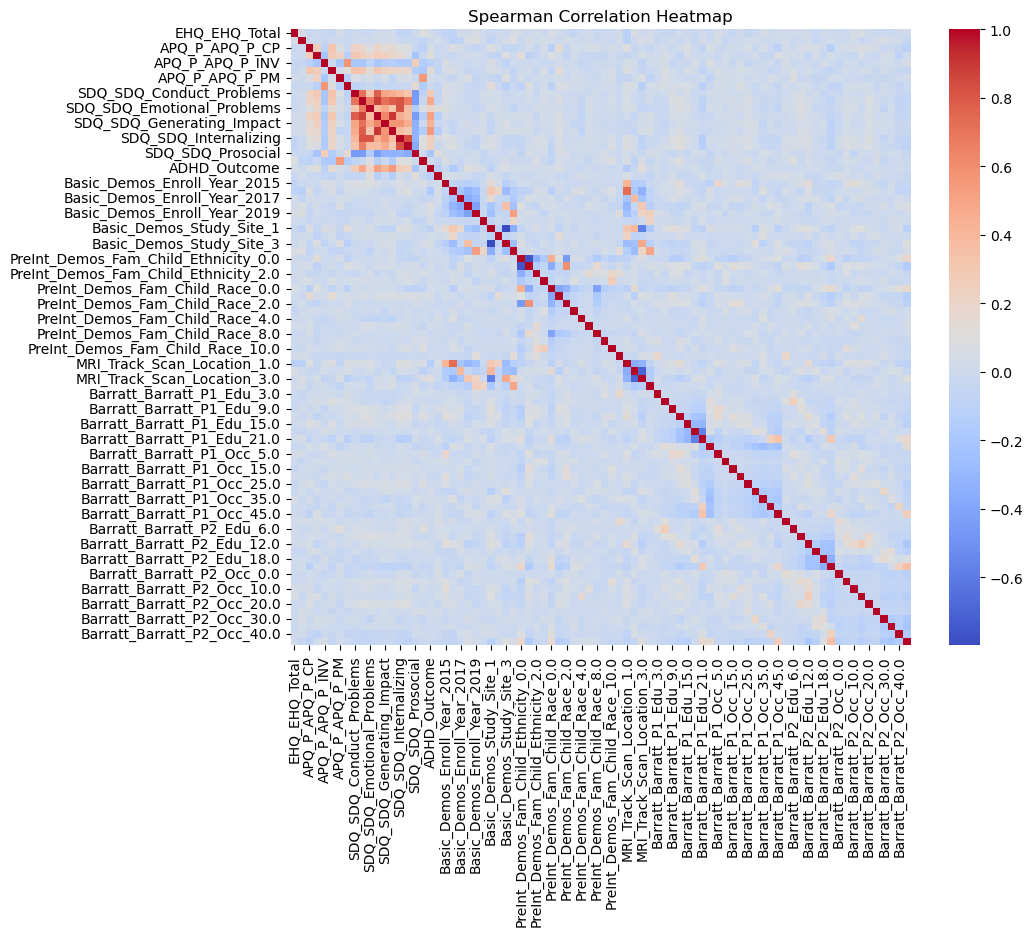

In [47]:
numerical_data = train_encoded.select_dtypes(include=np.number)

spearman_corr = numerical_data.corr(method='spearman')

significant_spearman = find_significant_correlations(spearman_corr)

print("\nSignificant Spearman Correlations:")
for corr in significant_spearman:
    print(f"Correlation between '{corr['feature1']}' and '{corr['feature2']}': {corr['correlation']}")


plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

Some strong internal relationships are worth noting - especially among SDQ variables:

- SDQ_SDQ_Conduct_Problems strongly correlates with: SDQ_SDQ_Externalizing, SDQ_SDQ_Difficulties_Total, SDQ_SDQ_Hyperactivity, SDQ_SDQ_Prosocial
This tells us:

Behavioral issues tend to co-occur: kids with conduct problems also show externalizing behaviors and hyperactivity.
Prosocial behavior is negatively associated with these problem behaviors as expected.

- APQ_P_APQ_P_INV and APQ_P_APQ_P_PP: 0.567

Suggests involvement and positive parenting are linked — could be interesting for family-based intervention studies.

- APQ_P_APQ_P_PM and MRI_Track_Age_at_Scan: 0.55

This is a little odd — maybe age at scan captures some maturity/monitoring trend?

All these variables show moderate to strong positive correlations with ADHD_Outcome (ADHD diagnosis = 1):

SDQ_SDQ_Hyperactivity → ρ ≈ 0.55

SDQ_SDQ_Externalizing → ρ ≈ 0.52

SDQ_SDQ_Difficulties_Total → ρ ≈ 0.48

SDQ_SDQ_Generating_Impact → ρ ≈ 0.42

These aren’t just associated — they're conceptually part of ADHD.

So, yes, it makes sense these are elevated in those diagnosed with ADHD — they’re symptoms, not just correlates.

## Database: BRAIN MRI

In [48]:
mri_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19905 entries, participant_id to no_ADHD_M
dtypes: float64(19900), int64(4), object(1)
memory usage: 184.2+ MB


In [ ]:
numerical_data_mri = mri_train.select_dtypes(include=np.number)

spearman_corr_mri = numerical_data_mri.corr(method='spearman')

significant_spearman_mri = find_significant_correlations(spearman_corr_mri, threshold=0.3)

print("\nSignificant Spearman Correlations:")
for corr in significant_spearman_mri:
    print(f"Correlation between '{corr['feature1']}' and '{corr['feature2']}': {corr['correlation']}")

In [50]:
len(significant_spearman_mri)

901228

Proposal to use PCA or delete features (f.e. 2nd feature) with really high correlation

Helps when:

- Data is super high-dimensional, like 19,900 brain features
- There's a lot of collinearity (highly correlated connections) > 0,3 moderate to very strong correlation  110 000 corr.
- To reduce noise and prevent overfitting

## Database: FULL DATA BASE

In [51]:
all_train = pd.merge(train_encoded, train_fcm, on='participant_id', how='inner')

print(all_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19983 entries, participant_id to 198throw_199thcolumn
dtypes: Int64(2), float64(19918), int64(62), object(1)
memory usage: 184.9+ MB
None


Correlation for whole database > 0.3

In [ ]:
numerical_data_all= all_train.select_dtypes(include=np.number)

spearman_corr_all = numerical_data_all.corr(method='spearman')

significant_spearman_all = find_significant_correlations(spearman_corr_all, threshold=0.3)

print("\nSignificant Spearman Correlations:")
for corr in significant_spearman_all:
    print(f"Correlation between '{corr['feature1']}' and '{corr['feature2']}': {corr['correlation']}")

In [53]:
len(significant_spearman_mri)

901228

List of high correlated features: > 0.7

In [ ]:
for corr in significant_spearman_all:
    if abs(corr['correlation']) > 0.7:
        print(f"Correlation between '{corr['feature1']}' and '{corr['feature2']}': {corr['correlation']}")

List of correlations > 0.3 for target columns (categorical and quanttity)

In [55]:
target_columns = train_encoded.columns

In [56]:
target_set = set(target_columns)

filtered_results = [
    corr for corr in significant_spearman_all
    if corr['feature1'] in target_set or corr['feature2'] in target_set
]


for corr in filtered_results:
    print(f"Correlation between '{corr['feature1']}' and '{corr['feature2']}': {corr['correlation']:.3f}")

Correlation between 'APQ_P_APQ_P_CP' and 'APQ_P_APQ_P_OPD': 0.312
Correlation between 'APQ_P_APQ_P_ID' and 'SDQ_SDQ_Conduct_Problems': 0.305
Correlation between 'APQ_P_APQ_P_INV' and 'APQ_P_APQ_P_PP': 0.567
Correlation between 'APQ_P_APQ_P_OPD' and 'SDQ_SDQ_Conduct_Problems': 0.343
Correlation between 'APQ_P_APQ_P_OPD' and 'SDQ_SDQ_Difficulties_Total': 0.305
Correlation between 'APQ_P_APQ_P_OPD' and 'SDQ_SDQ_Externalizing': 0.310
Correlation between 'APQ_P_APQ_P_PM' and 'MRI_Track_Age_at_Scan': 0.550
Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Difficulties_Total': 0.706
Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Emotional_Problems': 0.330
Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Externalizing': 0.780
Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Generating_Impact': 0.496
Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Hyperactivity': 0.462
Correlation between 'SDQ_SDQ_Conduct_Problems' and 'SDQ_SDQ_Internaliz

Correlation between MRI_Track_Age_at_Scan and BRAIN MRI and MRI_Track_Scan_Location and Brain scan - Moderate 0.3-0.4

# 7. Conclusions

✅ Conclusions

ADHD diagnosis is moderately correlated with:

SDQ Total Difficulties

Externalizing and Hyperactivity

Generating Impact scores

Gender (Sex_F) doesn’t show a significant monotonic correlation with ADHD or other variables — further analysis (nonlinear models, interactions) may help.

Strong inter-correlations exist among SDQ behavioral scores and some parenting dimensions, suggesting natural clusters.

1. Clear on the construct overlap

We're essentially finding what we expect to find — confirmation that SDQ items are good at identifying ADHD characteristics.

👉 These variables are not independent predictors — they’re indicators of the same latent construct (ADHD symptoms).

2. Don't use all these together as separate features

They're highly correlated with each other too (e.g., Hyperactivity & Externalizing: ρ ≈ 0.9), which introduces multicollinearity.

Options:

Use only one (e.g., Hyperactivity) if you want a clean, interpretable model.

Or create a composite score (like a PCA component or average of the scores).

Or keep them and use regularization methods (e.g., Lasso) to avoid overfitting.

3. Consider removing them in prediction tasks

If we’re trying to predict ADHD using features outside of the diagnosis criteria, including these is circular (because they are symptoms). Instead, look for:

Parenting scores (APQ_*)

Demographics

MRI Age

Socioeconomic indicators (Barratt_*)

4. Use them for validation, not prediction

You can keep them to check model performance — e.g., "do kids classified by my model as likely ADHD also have high Hyperactivity scores?" This is construct validity.

5. Missing Values:

Parenting scores (APQ_*)

MRI Age

Socioeconomic indicators (Barratt_*)

A lot missing values - consider to delete those features

6. Proposal to use PCA or delete features (f.e. 2nd feature) with really high correlation

Helps when:

- Data is super high-dimensional, like 19,900 brain features
- There's a lot of collinearity (highly correlated connections) > 0,3 moderate to very strong correlation  110 000 corr.
- To reduce noise and prevent overfitting

⚠️ No correlation fo gender or ADHD feature with brain MRI correlation matrix